## Multidimensional datasets

In [1]:
from spectrochempy.api import *


SpectroChemPy's API
    Version   : 0.1.1dev.6
    Copyright : © 2014-2017, LCS - Laboratory for Catalysis and Spectrochempy



### ND-Dataset

Multidimensional array are defined in Spectrochempy using the NDDataset object.

Below is an example, with a 3D-array with axes. 

Let's first create the 3 axis:

In [16]:
axe0 = Axis(coords = np.linspace(200., 300., 3),
            labels = ['cold', 'normal', 'hot'],
            mask = None,
            units = "K",
            title = 'temperature')

axe1 = Axis(coords = np.linspace(0., 60., 100),
            labels = None,
            mask = None,
            units = "minutes",
            title = 'time-on-stream')

axe2 = Axis(coords = np.linspace(4000., 1000., 10),
            labels = None,
            mask = None,
            units = "cm^-1",
            title = 'wavelength')

Here is the displayed info for axe1 for instance:

In [17]:
axe1

title,Time-on-stream
coordinates,"[ 0 0.606 ..., 59.4 60]"
units,min


Now we create some 3D data:

In [18]:
nd_data=np.array([np.array([np.sin(axe2.data*2.*np.pi/4000.)*np.exp(-y/60.) for y in axe1.data])*float(T) 
         for T in axe0.data])**2

The dataset is now create with these data and defined axis:

In [19]:
mydataset = NDDataset(nd_data,
               axes = [axe0, axe1, axe2],
               title='Absorbance',
               units='absorbance'
              )

mydataset.description = """Dataset example created for this tutorial. 
It's a 3-D dataset (with dimensionless intensity)"""

mydataset.author = 'Tintin and Milou'

We can get some information about this object:

In [20]:
mydataset

NDDataset([[[ 2.4e-27,    1e+04, ...,    3e+04,    4e+04],
            [2.35e-27,  9.8e+03, ..., 2.94e+04, 3.92e+04],
            ..., 
            [3.31e-28, 1.38e+03, ..., 4.14e+03, 5.52e+03],
            [3.25e-28, 1.35e+03, ..., 4.06e+03, 5.41e+03]],

           [[3.75e-27, 1.56e+04, ..., 4.69e+04, 6.25e+04],
            [3.67e-27, 1.53e+04, ..., 4.59e+04, 6.13e+04],
            ..., 
            [5.18e-28, 2.16e+03, ..., 6.47e+03, 8.63e+03],
            [5.07e-28, 2.11e+03, ..., 6.34e+03, 8.46e+03]],

           [[ 5.4e-27, 2.25e+04, ..., 6.75e+04,    9e+04],
            [5.29e-27, 2.21e+04, ..., 6.62e+04, 8.82e+04],
            ..., 
            [7.46e-28, 3.11e+03, ..., 9.32e+03, 1.24e+04],
            [7.31e-28, 3.05e+03, ..., 9.14e+03, 1.22e+04]]])

NDDataset can be sliced like conventional numpy-array...

In [21]:
new = mydataset[..., 0]
new

NDDataset([[[ 2.4e-27],
            [2.35e-27],
            ..., 
            [3.31e-28],
            [3.25e-28]],

           [[3.75e-27],
            [3.67e-27],
            ..., 
            [5.18e-28],
            [5.07e-28]],

           [[ 5.4e-27],
            [5.29e-27],
            ..., 
            [7.46e-28],
            [7.31e-28]]])

or using the axes labels:

In [22]:
new = mydataset['hot']
new

NDDataset([[[ 5.4e-27, 2.25e+04, ..., 6.75e+04,    9e+04],
            [5.29e-27, 2.21e+04, ..., 6.62e+04, 8.82e+04],
            ..., 
            [7.46e-28, 3.11e+03, ..., 9.32e+03, 1.24e+04],
            [7.31e-28, 3.05e+03, ..., 9.14e+03, 1.22e+04]]])

Single-element dimension are kept but can also be squeezed easily:

In [23]:
new = new.squeeze()
new

NDDataset([[ 5.4e-27, 2.25e+04, ..., 6.75e+04,    9e+04],
           [5.29e-27, 2.21e+04, ..., 6.62e+04, 8.82e+04],
           ..., 
           [7.46e-28, 3.11e+03, ..., 9.32e+03, 1.24e+04],
           [7.31e-28, 3.05e+03, ..., 9.14e+03, 1.22e+04]])

To plot a dataset, use the `plot` command (generic plot). As the NDDataset is 2D, a contour plot is displayed by default.

<IPython.core.display.Javascript object>


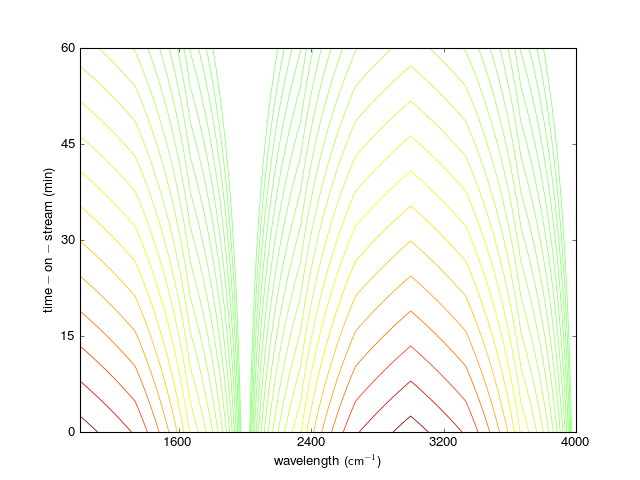

In [24]:
new.plot()

We can change or add labels to axes after creation of the dataset

In [28]:
from datetime import datetime, timedelta
axe1.labels = [timedelta(minutes=t) for t in axe1.data]
axe1

title,Time-on-stream
coordinates,"[ 0 0.606 ..., 59.4 60]"
units,min
labels,"[0:00:00 0:00:36.363636 ..., 0:59:23.636364 1:00:00]"


In [29]:
axe1[20].labels
#todo: this should be a single object not a a zeooD array!!!!

array(datetime.timedelta(0, 727, 272727), dtype=object)

Dataset can be transposed

In [30]:
newT = new.T
newT

NDDataset([[ 5.4e-27, 5.29e-27, ..., 7.46e-28, 7.31e-28],
           [2.25e+04, 2.21e+04, ..., 3.11e+03, 3.05e+03],
           ..., 
           [6.75e+04, 6.62e+04, ..., 9.32e+03, 9.14e+03],
           [   9e+04, 8.82e+04, ..., 1.24e+04, 1.22e+04]])

<IPython.core.display.Javascript object>


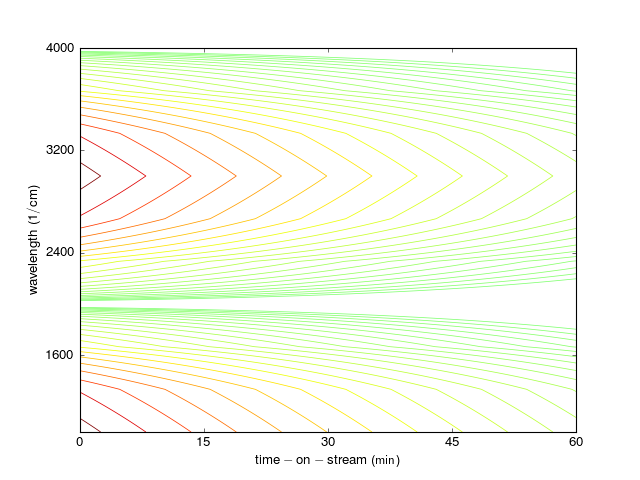

In [32]:
newT.plot()

Now, lets load a NMR dataset (in the Bruker format)

In [33]:
import os

path = os.path.join('..','tests','testdata', 'bruker', 'tests', 'nmr','bruker_1d')

# create an empty dataset 
ndd = NDDataset()

# load the data
ndd.read_bruker(path, expno=1, remove_digital_filter=True)

# view it...
fig1 = ndd.view() 
fig1

TypeError: 'NoneType' object is not callable

In [ ]:
path = os.path.join('..','tests','testdata', 'bruker', 'tests', 'nmr','bruker_2d')

# create an empty dataset 
ndd2 = NDDataset()

# load the data
ndd2.read_bruker(path, expno=1, remove_digital_filter=True)

# view it...
ndd2.x.to('ms')
ndd2.y.to('ms')
fig2 = ndd2.view() 
fig2

To display a list of the currently **available services**, we just need to type

In [ ]:
available_services

### Using the API: a first example

If you are interested by **NMR**, it might be useful to have information about NMR isotopes, *e.g.*, to include this in some further calculations.

Let's get information about the $^{27}$Al nucleus. 

We use the **Isotopes** class:

In [ ]:
al = Isotopes('27Al')
al

In [ ]:
print(al.symbol, al.spin)

In [ ]:
quadrupolar_moment = al.Q.to('m^2') 
quadrupolar_moment

In [ ]:
gyromagnetic_ratio = al.gamma
gyromagnetic_ratio

It is then obvious how to get the Larmor frequency of aluminium:

In [ ]:
Bo = quantity('9.4 tesla')
print("{:~.2f} at {:~.2f}".format(al.gamma * Bo, Bo))

In [ ]:
np.sin(1)

# The dataset object

In [ ]:
print(da)

In [ ]:
da

In [ ]:
al.gamma

In [ ]:
from pint import UnitRegistry
ur = UnitRegistry()

In [ ]:
(1 * ur.rps)

In [ ]:
1 * ur.rad

In [ ]:
print(da[4000.])

In [ ]:
da[4000]

In [ ]:
darange =da[4000., :,  'normal':'hot']
print(darange)

In [ ]:
print(da[0,1,2])

In [ ]:
from spectrochempy.api import NDDataset
ndd = NDDataset([1., 2., 3.])
print(ndd)

In [ ]:
print(np.sqrt(ndd))

In [ ]:
dx = [0, 1, 2, 3]   # a simple list
da = NDDataset(dx)
da.title = 'intensity'
da.description = 'Some experimental measurements'
print(da)

In [ ]:
da.title = 'intensity '
da.description = 'Some experimental measurements'
print(da)

In [ ]:
da.title = 'intensity '
da.description = 'Some experimental measurements'
da.units = 'dimensionless'
print(da)

In [ ]:
print(da)

In [ ]:
db = NDDataset(da, units='mol/g', title='concentration')
print(db)

In [ ]:
nd = NDDataset([  [1.+2.j, 2.+0j], [1.3+2.j, 2.+0.5j],
                  [1.+4.2j, 2.+3j], [5.+4.2j, 2.+3j ] ])
assert nd.data.size == 16
assert nd.size == 8
assert nd.data.shape == (4, 4)
assert nd.shape == (4, 2)

nd._is_complex[0] = True

In [ ]:
print(nd)

In [ ]:
print(nd.real(axis=1))

In [ ]:
nd

In [ ]:
nd.real(0)

In [ ]:
nd.imag(0)

In [ ]:
nd

In [ ]:
nd.T

In [ ]:
nd.transpose(1,0)

In [ ]:
nd = NDDataset()
nd._data = np.random.random((10, 10))
nd.set_complex(axis=-1)    # this means that the data are complex in
nd.shape

In [ ]:
nd.shape

In [ ]:
dx = np.random.random((10, 100, 3))

axe0 = Axis(coords = np.linspace(4000., 1000., 10),
            labels = 'a b c d e f g h i j'.split(),
            mask = None,
            units = "cm^-1",
            title = 'wavelength')

axe1 = Axis(coords = np.linspace(0., 60., 100),
            labels = None,
            mask = None,
            units = "s",
            title = 'time-on-stream')

axe2 = Axis(coords = np.linspace(200., 300., 3),
            labels = ['cold', 'normal', 'hot'],
            mask = None,
            units = "K",
            title = 'temperature')

da = NDDataset(dx,
                   axes = [axe0, axe1, axe2],
                   title='absorbance',
                   units='dimensionless'
                   )
print(da)

In [ ]:
da.set_complex(axis=1)
da.set_complex(axis=0)
print(da)

In [ ]:
db = da.swapaxes(2, 0)
print(db)

In [ ]:
print(db.axes)

In [ ]:
print(db.T)

In [ ]:
db.axes

In [ ]:
db.axes._axes.reverse()
db.axes._axes

In [ ]:
Application

In [ ]:
quantity('10. cm')

In [ ]:
10. * units.cm

In [ ]:
measurement(10,1,'km')

In [ ]:
%precision 2

In [ ]:
quantity("900 km / (8 hours)")

In [ ]:
a = np.arange(20)
a[slice(2, 3, None)].squeeze(), a[2]

In [ ]:
a

In [ ]:
a < a*2

In [ ]:
from IPython.display import display, Latex
Latex(r"${:Lx}$".format(quantity(1. , ur.us)))

In [ ]:
from spectrochempy.api import *

In [ ]:
path = "/Users/christian/Dropbox/PycharmProjects/spectrochempy/tests/testdata/bruker/tests/nmr/bruker_1d"
ndd = NDDataset()
ndd.read_bruker(path, expno=1, remove_digital_filter=False)

fig1 = ndd.view(savefig='essai')
fig2 = ndd.view()

In [ ]:
ndd2 = ndd.copy()

In [ ]:
ndd2.view(fig=fig1, offset=.4)

In [ ]:
fig = ndd2.view(savefig='essai')
fig

In [ ]:
ndd2.view(fig=2, offset=-.6,)
plt.show()

In [ ]:
import matplotlib as mpl
print(mpl.rcParams)
mpl.rcParams['axes.formatter.unicode_minus']

In [ ]:
axe0

In [ ]:
x = np.linspace(0,100.,100)
w = x[-1]-x[0]
f = lambda x, off=x[0], end=x[-1], pow=1 : np.sin(np.pi*off/w + np.pi*(end - off)*x /w/(x.size-1))

In [ ]:
w

In [ ]:
plt.plot(x, f(x,50,100.))
plt.show()

In [ ]:
i = np.arange(100)
size = len(i)
g = lambda i, off=0, end=1, pow=1: np.sin( np.pi*off + np.pi*(end-off)*i/(size-1) )**pow

In [ ]:
plt.plot(i,g(i, 0.5, 1))
plt.show()

True